# Experiment 1


---

## 1. Dataset Creation

> Prof Dino has major GI issues (I do), stemming from a gluten and a lactose allergy. Let's just say that if he eats something with gluten or drinks something with lactose, then next day(s) he has diarrhea. Create a dataset with breakfast, morning tea, lunch, afternoon tea, dinner, toilet. Each column is binary (T/F) values, and for breakfast, lunch, and dinner denotes whether or not I had gluten. For both tea columns, it's whether I had tea with milk. Toilet T means diarrhea. Create that dataset randomly as T/F values, for all columns. Make sure the label is balanced around T/F.

## 1.1 Generate Randomly Selected Data

To achieve this, I will outline the steps to create a balanced dataset with $43,800$ rows, equivalent to approximately $120$ years of data (All I wish Prof. Dino will live forever, but my RAM is small.):

1. Create a dataframe called df_daily with five columns: `Breakfast`, `Morning_Tea`, `Lunch`, `Afternoon_Tea`, and `Dinner`.

2. Add $43,800$ rows to df_daily where all values are randomly filled with $True$ or $False$.

By following these steps, we can generate a balanced dataset around $True$ and $False$ values.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Concatenate
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Number of days for this dataset
num_rows = 43800  # Change this as needed
n_days = 43800

In [2]:
# Create a balanced binary dataset
df_daily = pd.DataFrame({
    'Breakfast': np.random.choice([True, False], num_rows),
    'Morning_Tea': np.random.choice([True, False], num_rows),
    'Lunch': np.random.choice([True, False], num_rows),
    'Afternoon_Tea': np.random.choice([True, False], num_rows),
    'Dinner': np.random.choice([True, False], num_rows),
    'Toilet': np.random.choice([True, False], num_rows),
})


## 1.2 Check Dataframe Shape

In [3]:
df_daily.shape

(43800, 6)

By following this approach, we have successfully obtained a dataset with $43,800$ rows and $6$ labels. To ensure the data's integrity, let's perform a sanity check to confirm that there are no $NaN$ values present.

---

## 1.3 Sanity Check

### 1.3.1 Check NaN

Here's the code snippet to perform the sanity check:

In [4]:
# Check for NaN values in the dataset
nan_values = df_daily.isnull().sum().sum()

if nan_values == 0:
    print("Sanity check passed: No NaN values detected in the dataset.")
else:
    print("Sanity check failed: NaN values detected in the dataset.")

Sanity check passed: No NaN values detected in the dataset.


Then, let's examine all the column names in the dataframe df_daily to get an overview of the available columns.

In [5]:
column_names = df_daily.columns.tolist()

print("Column names in the dataframe df_daily:")
print(column_names)

Column names in the dataframe df_daily:
['Breakfast', 'Morning_Tea', 'Lunch', 'Afternoon_Tea', 'Dinner', 'Toilet']


Next, let's examine the distribution of values in the `Toilet` column of the dataframe to assess the dataset's balance. This will provide insights into the proportion of `True` and `False` values in the dataset.

In [6]:
# Check the distribution of values in the 'Toilet' column
toilet_distribution = df_daily['Toilet'].value_counts()

print("Distribution of values in the 'Toilet' column:")
print(toilet_distribution)

Distribution of values in the 'Toilet' column:
False    21961
True     21839
Name: Toilet, dtype: int64


<AxesSubplot:xlabel='Toilet', ylabel='count'>

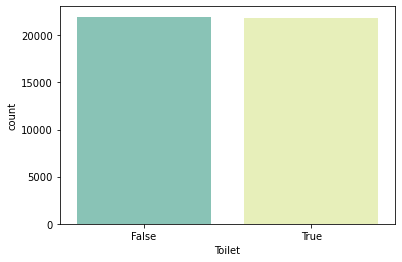

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Visualize the distribution of values in column 'Toilet'
sns.countplot(x = df_daily['Toilet'], palette=["#7fcdbb", "#edf8b1"])

### 1.3.2 Check Value Distribution Across All Columns

Next, we will examine the distribution of 'True' and 'False' values in all columns of the dataframe.

In [8]:
for col in df_daily.columns:
    print(df_daily[col].value_counts())

False    21923
True     21877
Name: Breakfast, dtype: int64
True     22030
False    21770
Name: Morning_Tea, dtype: int64
False    22006
True     21794
Name: Lunch, dtype: int64
False    21924
True     21876
Name: Afternoon_Tea, dtype: int64
False    21904
True     21896
Name: Dinner, dtype: int64
False    21961
True     21839
Name: Toilet, dtype: int64


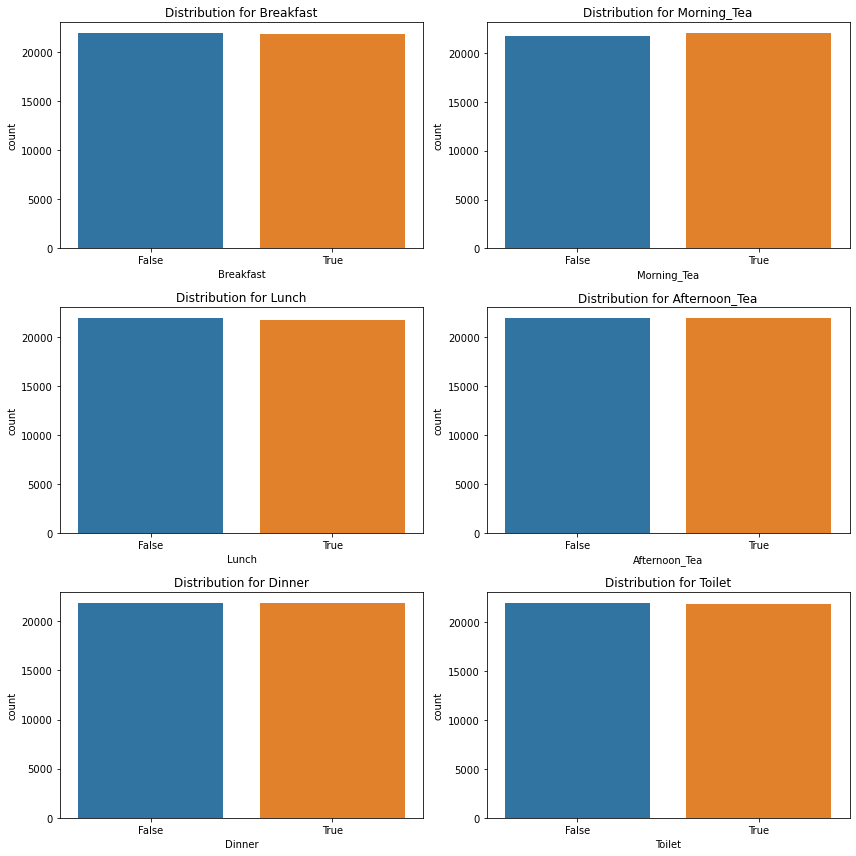

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(8, 8))

axes = axes.flatten()  # Using this can turn the 2D grid of axes into a flat array

for i, col in enumerate(df_daily.columns):
    sns.countplot(x=df_daily[col], ax=axes[i])
    axes[i].set_title(f"Distribution for {col}")

plt.tight_layout()
plt.show()


Based on the distribution of values in all columns as shown above, we can infer that the dataset is balanced. This conclusion is drawn from observing that there is a roughly equal number of $True$ and $False$ values in the column. With this confirmation, we can proceed to the next step: model creation.

---

# 2. Model Creation

To create a neural network model with two subnetworks based on the dataframe `df_daily`, where each subnetwork predicts the value in the `Toilet` column for the next row, and split the data into training, validation, and testing sets, we are following these steps:

1. Split the dataframe into features (input) and labels (output), shift the labels by 1.

2. Determine the indices for splitting the data into training, validation, and testing sets based on the provided percentages.

3. Create the gluten subnetwork using the `Breakfast`, `Lunch`, and `Dinner` columns.

4. Create the lactose subnetwork using the `Morning_Tea` and `Afternoon_Tea` columns.

5. Concatenate the output of the subnetworks.

6. Add a one-neuron dense layer to the concatenated output for the final prediction of the `Toilet` label.

7. Compile the model with an appropriate loss function and optimizer.

8. Train the model using the training set and validate using the validation set.

9. Evaluate the model's performance using the testing set.

In [10]:
# df_daily = df_daily.astype(int)

In [11]:
# Split the dataframe into features (input) and labels (output)
features = df_daily[['Breakfast', 'Lunch', 'Dinner', 'Morning_Tea', 'Afternoon_Tea']][0:21900*2 - 1]
labels = df_daily['Toilet'][1:]

Perform an inspection to check the number of rows in the feature and label dataframes and verify if they have the same length. Doing this will display the number of rows in the features and labels dataframes. It will also indicate whether the two dataframes have the same length or not.

In [12]:
num_features_rows = len(features)
num_labels_rows = len(labels)

print("Number of rows in features dataframe:", num_features_rows)
print("Number of rows in labels dataframe:", num_labels_rows)

if num_features_rows == num_labels_rows:
    print("The feature and label dataframes have the same length.")
else:
    print("The feature and label dataframes do not have the same length.")


Number of rows in features dataframe: 43799
Number of rows in labels dataframe: 43799
The feature and label dataframes have the same length.


In [13]:
# Determine the indices for splitting the data
train_size = int(len(df_daily) * 0.8)
val_size = int(len(df_daily) * 0.1)
test_size = len(df_daily) - train_size - val_size

We first split the dataframe into features and labels. Then, we use the train_test_split() function from scikit-learn to split the data into training, validation, and testing sets based on the provided percentages.

In [14]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, concatenate
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model

In [15]:
# Split the data into training, validation, and testing sets
train_features = features.iloc[:train_size]
val_features = features.iloc[train_size:train_size+val_size]
test_features = features.iloc[-test_size:]

train_labels = labels.iloc[:train_size]
val_labels = labels.iloc[train_size:train_size+val_size]
test_labels = labels.iloc[-test_size:]

Next, we create the gluten and lactose subnetworks using the dense layers. The output of these subnetworks is concatenated, and a final prediction layer is added. The model is then compiled with the appropriate loss function and optimizer.

In [16]:
# Create the gluten subnetwork
gluten_input = Input(shape=(3,))
gluten_dense1 = Dense(64, activation='selu')(gluten_input)
gluten_dense2 = Dense(32, activation='selu')(gluten_dense1)
# gluten_output = Dense(1, activation='sigmoid')(gluten_dense2)
gluten_output = Dense(1, activation='selu')(gluten_dense2)

In [17]:
# Create the lactose subnetwork
lactose_input = Input(shape=(2,))
lactose_dense1 = Dense(64, activation='selu')(lactose_input)
lactose_dense2 = Dense(32, activation='selu')(lactose_dense1)
# lactose_output = Dense(1, activation='sigmoid')(lactose_dense2)
lactose_output = Dense(1, activation='selu')(lactose_dense2)

In [18]:
# Concatenate the output of the subnetworks
concatenated = concatenate([gluten_output, lactose_output])

In [19]:
# Build the final prediction layer
prediction = Dense(1, activation='sigmoid')(concatenated)

In [20]:
# Create the model
model = Model(inputs=[gluten_input, lactose_input], outputs=prediction)

The `Adam` optimizer is used with the specified learning rate of $0.001$. The optimizer is then passed to the **compile()** function to set the learning rate of the model.

In [21]:
# Set the learning rate
learning_rate = 0.001
optimizer = Adam(learning_rate=learning_rate)

In [22]:
# Compile the model with the specified learning rate
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

Let's then display a summary of the model's structure, including the number of parameters in each layer and the total number of trainable parameters.

In [23]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 3)]          0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 2)]          0           []                               
                                                                                                  
 dense (Dense)                  (None, 64)           256         ['input_1[0][0]']                
                                                                                                  
 dense_3 (Dense)                (None, 64)           192         ['input_2[0][0]']                
                                                                                              

In [24]:
for layer in model.layers:
        print("Layer Name: " + layer.name)
        print("Type of layer: " + layer.__class__.__name__)
        print("Input dimesion: {}".format(layer.input_shape[1:]))
        print("Output dimesion: {}".format(layer.output_shape[1:]))
        print("Parameter Count: {}".format( layer.count_params()))
        try:
            print("Activation : " + layer.activation.__name__)
            print(" ")
        except:
            print(" ")

Layer Name: input_1
Type of layer: InputLayer
Input dimesion: []
Output dimesion: []
Parameter Count: 0
 
Layer Name: input_2
Type of layer: InputLayer
Input dimesion: []
Output dimesion: []
Parameter Count: 0
 
Layer Name: dense
Type of layer: Dense
Input dimesion: (3,)
Output dimesion: (64,)
Parameter Count: 256
Activation : selu
 
Layer Name: dense_3
Type of layer: Dense
Input dimesion: (2,)
Output dimesion: (64,)
Parameter Count: 192
Activation : selu
 
Layer Name: dense_1
Type of layer: Dense
Input dimesion: (64,)
Output dimesion: (32,)
Parameter Count: 2080
Activation : selu
 
Layer Name: dense_4
Type of layer: Dense
Input dimesion: (64,)
Output dimesion: (32,)
Parameter Count: 2080
Activation : selu
 
Layer Name: dense_2
Type of layer: Dense
Input dimesion: (32,)
Output dimesion: (1,)
Parameter Count: 33
Activation : selu
 
Layer Name: dense_5
Type of layer: Dense
Input dimesion: (32,)
Output dimesion: (1,)
Parameter Count: 33
Activation : selu
 
Layer Name: concatenate
Type of 

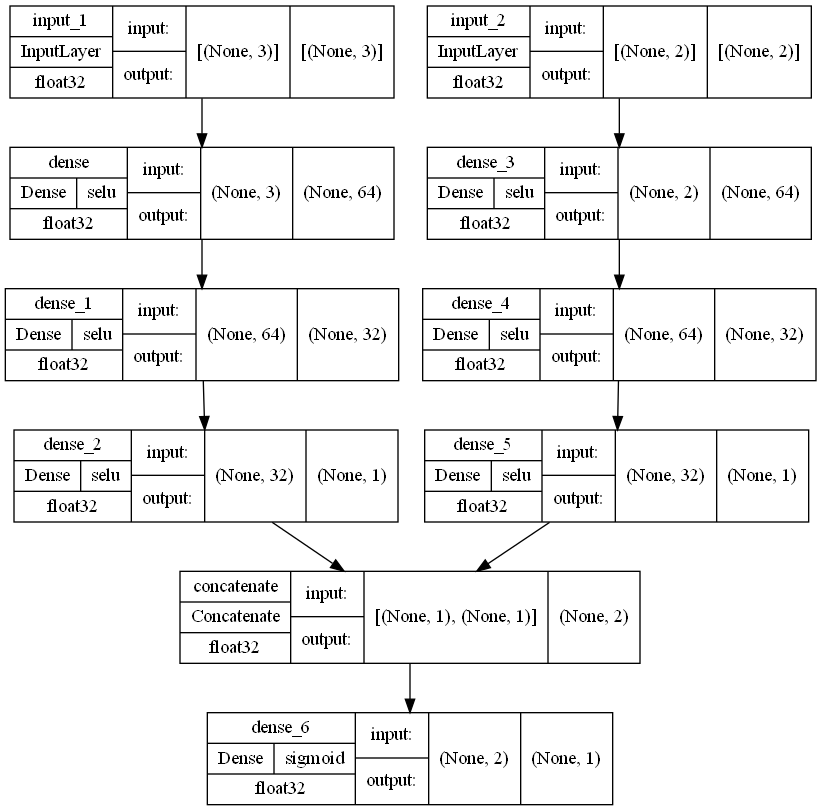

In [25]:
model_img_file = 'exp1_model.png'
plot_model(model, to_file=model_img_file, 
                          show_shapes=True, 
                          show_layer_activations=True, 
                          show_dtype=True,
                          show_layer_names=True )

By setting the epochs parameter to $20$, the model will iterate over the training data $20$ times during the training process. The `batch_size` parameter is set to $32$, which means that the model will update its weights after processing each batch of $32$ samples.

In [26]:
history = model.fit(
    [train_features[['Breakfast', 'Lunch', 'Dinner']], train_features[['Morning_Tea', 'Afternoon_Tea']]],
    train_labels,
    validation_data=([val_features[['Breakfast', 'Lunch', 'Dinner']], val_features[['Morning_Tea', 'Afternoon_Tea']]], val_labels),
    epochs=20,
    batch_size=32
)

Epoch 1/20
1095/1095 [==============================] - 3s 2ms/step - loss: 0.6978 - accuracy: 0.5011 - val_loss: 0.6937 - val_accuracy: 0.4968
Epoch 2/20
1095/1095 [==============================] - 2s 2ms/step - loss: 0.6945 - accuracy: 0.5087 - val_loss: 0.6975 - val_accuracy: 0.4968
Epoch 3/20
1095/1095 [==============================] - 2s 2ms/step - loss: 0.6946 - accuracy: 0.4978 - val_loss: 0.6939 - val_accuracy: 0.4952
Epoch 4/20
1095/1095 [==============================] - 2s 2ms/step - loss: 0.6941 - accuracy: 0.4988 - val_loss: 0.6941 - val_accuracy: 0.4954
Epoch 5/20
1095/1095 [==============================] - 2s 2ms/step - loss: 0.6943 - accuracy: 0.4972 - val_loss: 0.6931 - val_accuracy: 0.5032
Epoch 6/20
1095/1095 [==============================] - 2s 2ms/step - loss: 0.6938 - accuracy: 0.4980 - val_loss: 0.6933 - val_accuracy: 0.5032
Epoch 7/20
1095/1095 [==============================] - 2s 2ms/step - loss: 0.6937 - accuracy: 0.4994 - val_loss: 0.6933 - val_accuracy:

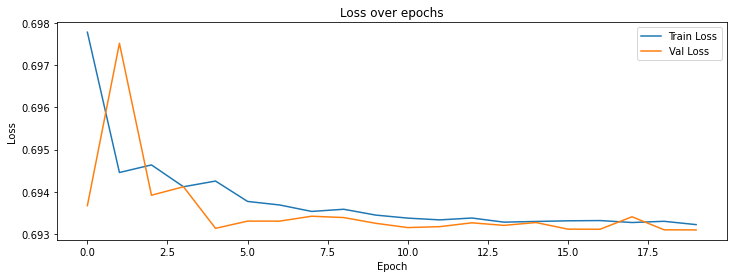

In [27]:
plt.figure(figsize=(12, 4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss over epochs')
plt.legend()
plt.show()

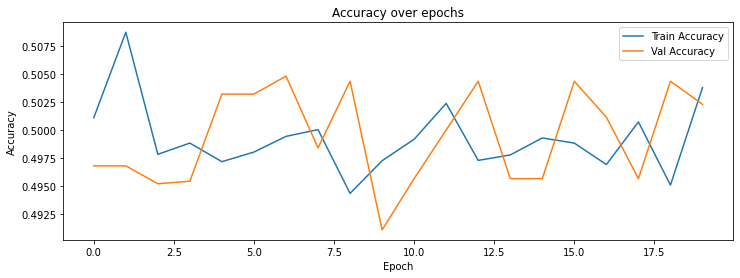

In [28]:
plt.figure(figsize=(12, 4))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy over epochs')
plt.legend()
plt.show()

In [29]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(
    [test_features[['Breakfast', 'Lunch', 'Dinner']], test_features[['Morning_Tea', 'Afternoon_Tea']]],
    test_labels
)

137/137 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.5091


---

## Conclusions/Thoughts:

Since the values in the dataframe were randomly generated, they do not adhere to any specific rule or pattern. For example, in reality, if Prof. Dino consumes anything containing lactose or gluten, it does not guarantee that he will use the bathroom on the next day. As a result, the prediction task becomes inherently uncertain, with a 50-50% chance of success.

Due to the unpredictable nature of the data and the lack of a deterministic relationship between the input features and the `Toilet` column, it is unrealistic to expect the neural network to achieve nearly $100%$ accuracy in training, validation, and testing. The network's performance will be influenced by the inherent randomness in the data, making it challenging to achieve high accuracy.

In such scenarios, where the underlying relationship between the features and the target variable is not well-defined, it is crucial to set realistic expectations for the model's performance. While the network may still learn certain patterns or associations, its accuracy will likely be limited by the inherent uncertainty and randomness in the data.

However, it is worth noting that the training loss and validation loss are decreasing while training the model, it indicates that the model is progressively improving its performance in terms of minimizing the error between its predictions and the actual target values.

But, the loss values remain relatively high, and the accuracy over epochs oscillates, it suggests that the model is struggling to fit the data and achieve low errors or discrepancies between its predictions and the actual target values. This echos with the issue I described in the first and second paragraph.